<a href="https://colab.research.google.com/github/shubhamsks/deep-learning/blob/master/mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


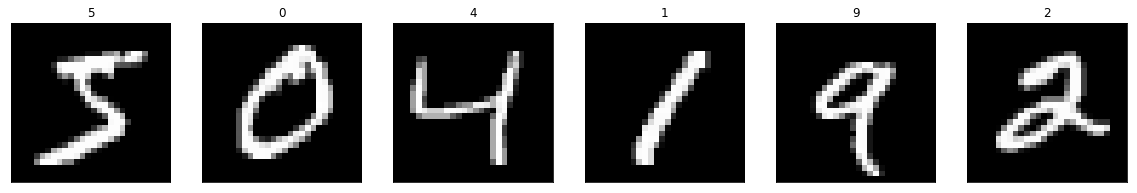

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
fig = plt.figure(figsize = (20,20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i + 1,xticks = [], yticks = [])
  ax.imshow(x_train[i], cmap = 'gray')
  ax.set_title(str(y_train[i]))


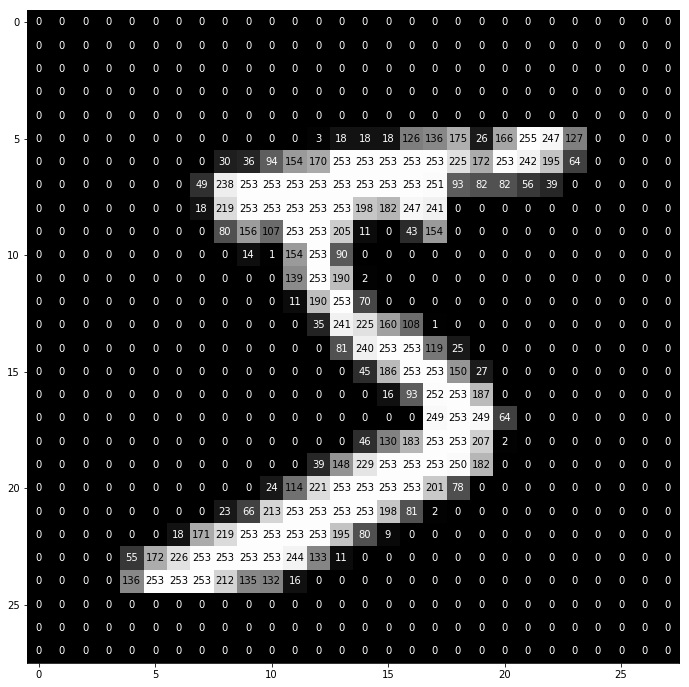

In [5]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)

In [6]:
print(type(x_train[0]))

<class 'numpy.ndarray'>


In [0]:

def visualize_pretty(img,ax):
  ax.imshow(img, cmap = 'gray')
  rows,cols = img.shape
  thresh = img.max()/25
  for i in range(rows):
    for j in range(cols):
      ax.annotate(round(img[i][j], 2), xy = (j, i),
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 color = 'white' if img[i][j] < thresh else 'gray')

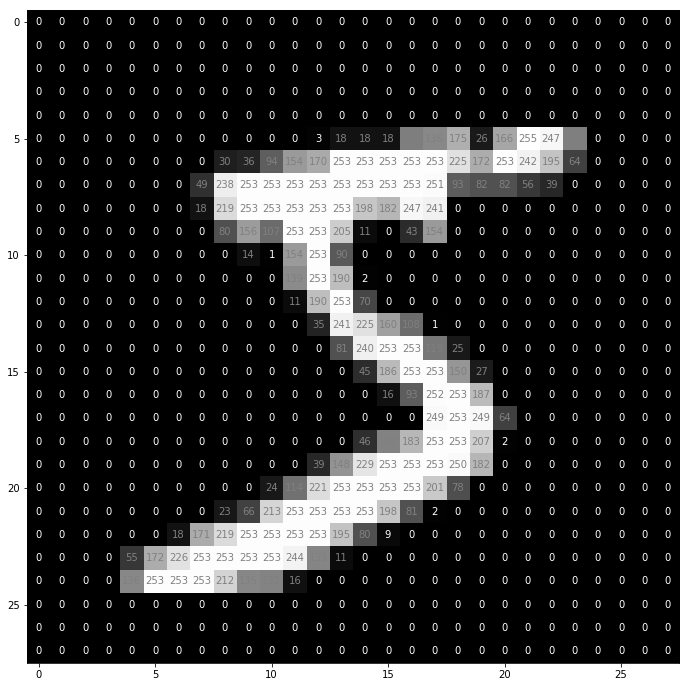

In [8]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_pretty(x_train[0],ax)

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

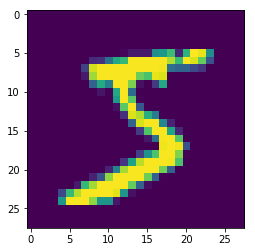

In [10]:
plt.imshow(x_train[0])

In [11]:
# one hot encoding the labels
from keras.utils import np_utils

print(y_train[:10])
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop',metrics = ['accuracy'])

In [70]:
score = model.evaluate(x_test, y_test, verbose = 0)
accuracy = 100 * score[1]
print('Test accuracy before training: {} '.format(accuracy))

Test accuracy before training: 10.5 


In [71]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.2739 - acc: 0.9163 - val_loss: 0.1414 - val_acc: 0.9580

Epoch 00001: val_loss improved from inf to 0.14136, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 2s 32us/step - loss: 0.1133 - acc: 0.9652 - val_loss: 0.0902 - val_acc: 0.9726

Epoch 00002: val_loss improved from 0.14136 to 0.09018, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 2s 31us/step - loss: 0.0814 - acc: 0.9744 - val_loss: 0.0891 - val_acc: 0.9738

Epoch 00003: val_loss improved from 0.09018 to 0.08911, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 1s 31us/step - loss: 0.0657 - acc: 0.9808 - val_loss: 0.0877 - val_acc: 0.9763

Epoch 00004: val_loss improved from 0.08911 to 0.08773, saving model to mnist.model.best.hdf5
Epoch 5/10
48000/48000 [==

In [0]:
model.load_weights('mnist.model.best.hdf5')

In [73]:
score = model.evaluate(x_test,y_test)
accuracy = 100*score[1]
print('Testing accuracy after training: {}'.format(accuracy))

10000/10000 [==============================] - 0s 45us/step
Testing accuracy after training: 98.08


In [74]:
print('hello ')

hello 
